<a href="https://colab.research.google.com/github/HagarIbrahiem/ML-Classification_Models/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook covers: 


1.   SVM Soft & Hard Margin Classification
2.   SVM - Classification (Linear SVM vs Non-linear SVM)
3. SVM Regression



#SVM-Classification



## **Linear SVM **

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
X=iris['data'][:,(2,3)]
y= (iris['target']==2).astype(np.float64)

In [5]:
svm_clf= Pipeline([('scaler', StandardScaler()) , ('svm_linear',LinearSVC(C=1 , loss='hinge')) ])
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_linear', LinearSVC(C=1, loss='hinge'))])

In [6]:
svm_clf.predict([X[5]])

array([0.])

In [7]:
svm_clf.predict([[5.5,1.7]])

array([1.])

## Non-Linear SVM

Adding features to make a dataset linearly separable

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


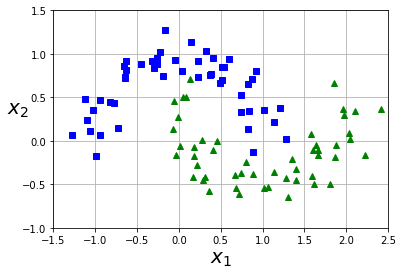

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt


def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures

Nonlinear_svm_clf = Pipeline( [ 
                               ('scaler', StandardScaler()),
                               ('linear_svm', LinearSVC(loss='hinge', C=10))])
Nonlinear_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svm', LinearSVC(C=10, loss='hinge'))])

In [11]:
plynomial_svm_clf = Pipeline( [ 
                              ('ply_features', PolynomialFeatures (degree=3)),
                               ('scaler', StandardScaler()),
                               ('linear_svm', LinearSVC(loss='hinge', C=10))])
plynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('ply_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svm', LinearSVC(C=10, loss='hinge'))])

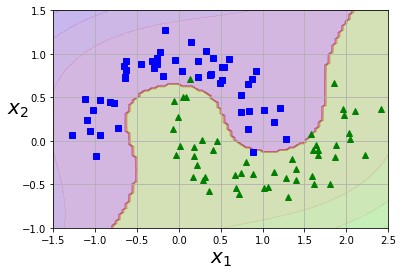

In [12]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(plynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

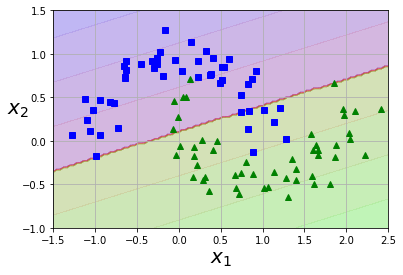

In [13]:
plot_predictions(Nonlinear_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

**Polynomial Kernel**

Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.
Fortunately, when using SVMs you can apply an almost miraculous mathematical
technique called the kernel trick (it is explained in a moment). It makes it possible to
get the same result as if you added many polynomial features, even with very highdegree
polynomials, without actually having to add them. So there is no combinatorial
explosion of the number of features since you don’t actually add any features. This
trick is implemented by the SVC class. Let’s test it on the moons dataset:

In [14]:
from sklearn.svm import SVC  #non-linear svm
poly_kernel_svm_clf = Pipeline ( [ ("scaler", StandardScaler()) , 
                                  ( 'svc' , SVC (kernel='poly' , degree=3, C= 5 , coef0=1) ) ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [15]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

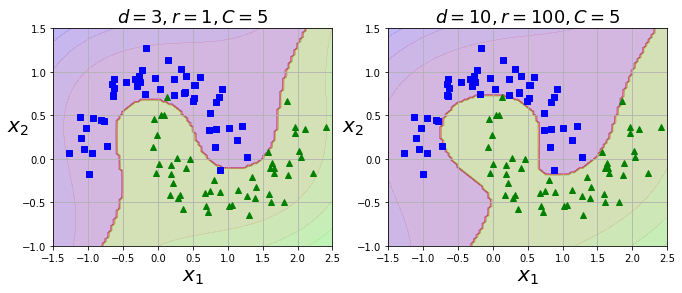

In [16]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

# save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

This code trains an SVM classifier using a 3rd-degree polynomial kernel. It is represented
on the left of Figure 5-7. On the right is another SVM classifier using a 10thdegree
polynomial kernel. Obviously, if your model is overfitting, you might want to
reduce the polynomial degree. Conversely, if it is underfitting, you can try increasing
it

P.S. The LinearSVC class is based on the liblinear library, which implements an optimized
algorithm for linear SVMs.1 It does not support the kernel trick,The SVC class is based on the libsvm library, which implements an algorithm that supports
the kernel trick.2 The training time complexity is usually between O(m2 × n)
and O(m3 × n). Unfortunately, this means that it gets dreadfully slow when the number
of training instances gets large (e.g., hundreds of thousands of instances). This
algorithm is perfect for complex but small or medium training sets. However, it scales
well with the number of features, especially with sparse features (i.e., when each
instance has few nonzero features).

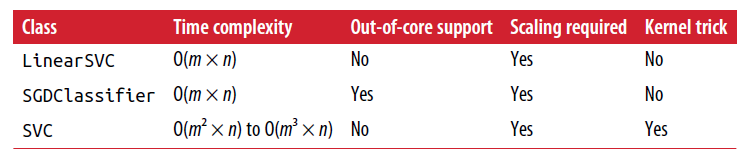


# SVM Regression

As we mentioned earlier, the SVM algorithm is quite versatile: not only does it support
linear and nonlinear classification, but it also supports linear and nonlinear
regression. The trick is to reverse the objective: instead of trying to fit the largest possible
street between two classes while limiting margin violations, SVM Regression
tries to fit as many instances as possible on the street while limiting margin violations
(i.e., instances off the street).

## Linear - Regreession

In [19]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [21]:
from sklearn.svm import LinearSVR
svr_reg = LinearSVR(epsilon=1.5 , random_state=42)
svr_reg.fit( X,y)

LinearSVR(epsilon=1.5, random_state=42)

In [22]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

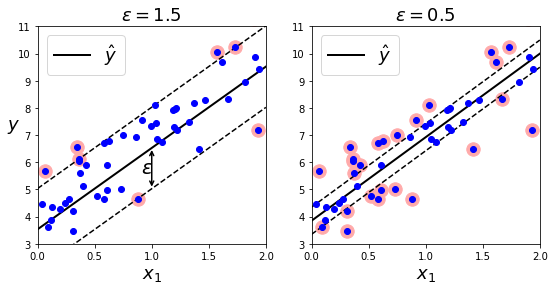

In [23]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
# save_fig("svm_regression_plot")
plt.show()

The width of the street is controlled by a hyperparameter
ϵ. Figure 5-10 shows two linear SVM Regression models trained on some random
linear data, one with a large margin (ϵ = 1.5) and the other with a small margin (ϵ =
0.5).

## Non-Linear Regression

In [24]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [25]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, gamma='auto', kernel='poly')

In [26]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="auto")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="auto")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, gamma='auto', kernel='poly')

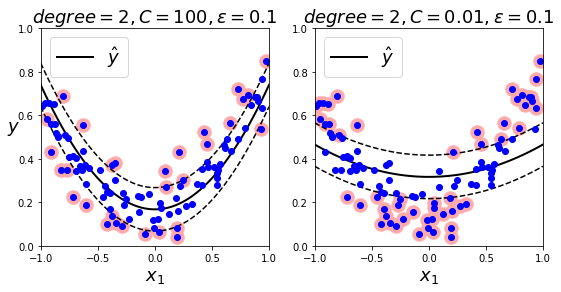

In [28]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
# save_fig("svm_with_polynomial_kernel_plot")
plt.show()

There is little regularization on the left plot (i.e., a large
C value), and much more regularization on the right plot (i.e., a small C value).

SVM regression using a 2nd-degree polynomial kernel
SVM Regression